<span style="color:DarkGreen; font-size: 30px;">Introducción</span>

En esta ocasión se implementará el criterio de entropía en una colección de textos relativamente simples (los poemas malditos) y a nivel letra;  y dos libros relativamente más complejos a nivel palabras.

Se parte de la definición de entropía: 

$$
{H(X)} = - \sum_{x \in X} p(x)*log_2 *{{p(x)}} 
$$

En este sentido, vamos a ver cuál de los textos produce más información. En este sentido, se encontrará que en aquellos conjuntos de información donde existe una alta probabilidad de ocurrencia para uno o varios elementos del recorrido de la variable aleatoria lo que implica que ese tipo de textos producen menos información porque existe menos incertidumbre o sorpresa, respecto a su resultado. De acuerdo con la literatura, la entropía representa el **promedio de incertidumbre en el campus o texto de interés**.

En este sentido, se considera que **la entropía alcanza su máximo cuando los posibles resultados tienen la misma probabilidad de ocurrencia**.

En la sección de conclusiones, se encontrará el análisis de los siguientes resultados:

![entropia_txt](comparacion_textos.png)

![entropia_txt](Comparacion_libros.png)



<span style="color:DarkGreen; font-size: 30px;">Desarrollo</span>

<span style="color:Blue; font-size: 30px;">1. Calcular la entropía global a nivel de carácter de los documentos text_1 al text_5  de manera independiente.</span>

In [1]:
# Dependencias: 
import io
import os
import pandas as pd
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import unicodedata
import math
import seaborn as sns
import numpy as np

### 1. Obteniendo la información

In [2]:

# Lista de archivos
list_of_names_text = ['text_1','text_2', 'text_3', 'text_4','text_5']
 
# lista vacía
dataframes_lista = []
 
# condicional para obtener la lista con todos los elementos
for i in range(5):
    temp_df = io.open("./textos/"+list_of_names_text[i]+".txt", encoding="UTF-8").readlines()
    dataframes_lista.append(''.join(temp_df)) # join para tener un texto integrado y evitar una lista de listas.


### 2. Eliminando los acentos en los cinco textos

In [3]:
# considerar todos los símbolos y convertir el texto a minúsculas
# Acentos
# Creamos la función para remover acentos, tal y como se presenta en la clase MCDI-PI-02.

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

textos_totales = len(dataframes_lista)
dataframe_lista_acentos = [remove_accents(dataframes_lista[i]) for i in range(textos_totales)]
dataframe_lista_acentos[1][:100] # Tomamos el segundo texto para confirmar eliminación de acentos.

'El hereje rebelde\nEn el verde cesped del eden, celebre sede de creyentes, el decente Efren se estrem'

### 3. Normalicemos las mayúsculas

In [4]:
dataframe_lista_acentos_minusc = [dataframe_lista_acentos[i].lower() for i in range(textos_totales)]
dataframe_lista_acentos_minusc[1][:100]

'el hereje rebelde\nen el verde cesped del eden, celebre sede de creyentes, el decente efren se estrem'

### 4. Búsqueda de símbolos y eliminación

In [5]:

# Contemos cada carácter de cada texto en nuestra lista maestra para verificar qué símbolos tenemos.

dataframe_lista_acentos_dic = [Counter(dataframe_lista_acentos_minusc[i]) for i in range(textos_totales)]

texto_1_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[0], orient='index')
texto_2_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[1], orient='index')
texto_3_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[2], orient='index')
texto_4_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[3], orient='index')
texto_5_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[4], orient='index')

#concatenemos para tener una sola vista de todos los simbolos y dónde se encuentran.

df_numero_caracteres = pd.concat([texto_1_simb,texto_2_simb, texto_3_simb, texto_4_simb, texto_5_simb ], axis=1)

# veamos toda la tabla y revisemos qué tenemos:

pd.set_option('display.max_rows',df_numero_caracteres.shape[0]+1)

df_numero_caracteres.columns = ['Texto_1','Texto_2','Texto_3','Texto_4','Texto_5']

# sólo para mejorar la visualización usamos un seaborn heatmap:

df_numero_caracteres.style.format('{:,}').background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,Texto_1,Texto_2,Texto_3,Texto_4,Texto_5
c,153.0,93.0,72.0,201.0,61.0
a,"1,863.0",nan,nan,nan,1.0
n,202.0,246.0,137.0,190.0,81.0
t,155.0,185.0,34.0,136.0,74.0
,920.0,658.0,339.0,653.0,297.0
s,296.0,247.0,172.0,324.0,120.0
,4.0,17.0,27.0,15.0,14.0
b,180.0,53.0,21.0,32.0,31.0
r,338.0,284.0,56.0,247.0,100.0
h,74.0,28.0,34.0,38.0,17.0


In [6]:
# En términos absolutos cuál es el texto más grande en términos de carácteres:

Totales_car = [df_numero_caracteres[f'Texto_{i}'].sum() for i in range(1,6)]

Totales_car

[5538.0, 4204.0, 2118.0, 3876.0, 1762.0]

In [7]:
# Como se puede ver, los carácteres que dan menos información y generan ruido en el análisis son:

# paréntesis
# apostrofe
# signos de interrogación
# coma
# dos puntos 
# punto y coma
# espacios en blanco


# Para su eliminación se consideró lo siguiente
# En pandas se eliminan aquellos símbolos que precisamente se consideran con poca información por la frecuencia con la que aparecen en todos los textos.
# No es el caso de aquellos carácteres que NO aparecen en todos los textos:
    
# Index(['c', 'a', 'n', 't', ' ', 's', '\n', 'b', 'r', 'h', 'm', 'd', 'l', ':',
#        'p', 'z', ',', ';', 'v', 'g', '.', '«', 'y', '—', '»', 'j', 'f', '¿',
#        '?', '¡', '!', '’', 'e', 'x', 'k', 'i', '(', ')', 'o', 'u', 'q'],
#       dtype='object')

df_numero_caracteres.drop([' ','\n', '.', '«', '—', '»', '¿', '?', '’', '(', ')', ',', ';',':', '!', '¡'], axis=0, inplace=True) # se eliminan 15 símbolos de puntuación en el df.

# El resultado es
df_numero_caracteres_sim = df_numero_caracteres.style.format('{:,}').background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

df_numero_caracteres_sim

,Texto_1,Texto_2,Texto_3,Texto_4,Texto_5
c,153.0,93.0,72.0,201.0,61.0
a,"1,863.0",nan,nan,nan,1.0
n,202.0,246.0,137.0,190.0,81.0
t,155.0,185.0,34.0,136.0,74.0
s,296.0,247.0,172.0,324.0,120.0
b,180.0,53.0,21.0,32.0,31.0
r,338.0,284.0,56.0,247.0,100.0
h,74.0,28.0,34.0,38.0,17.0
m,158.0,79.0,69.0,100.0,45.0
d,97.0,189.0,23.0,76.0,49.0


**A primera vista y sin haber realizado el análisis exploratorio de esta información se observa una alta cantidad de letras vocales en un patron interesante y equivalente a 1/3 de cada texto para una sola vocal en el orden que se presenta a continuación:**

In [8]:
# print(f'El Texto 1 tiene {df_numero_caracteres['Texto_1'].max()} que equivalen a {df_numero_caracteres[Texto_1].max()/Totales_car[0]}%')

print(f"El Texto 1 tiene {df_numero_caracteres['Texto_1'].max()} letras 'a', que equivalen a {round((df_numero_caracteres['Texto_1'].max()/Totales_car[0])*100,2)}%")
print(f"El Texto 2 tiene {df_numero_caracteres['Texto_2'].max()} letras 'e', que equivalen a {round((df_numero_caracteres['Texto_2'].max()/Totales_car[1])*100,2)}%")
print(f"El Texto 3 tiene {df_numero_caracteres['Texto_3'].max()} letras 'i', que equivalen a {round((df_numero_caracteres['Texto_3'].max()/Totales_car[2])*100,2)}%")
print(f"El Texto 4 tiene {df_numero_caracteres['Texto_4'].max()} letras '0', que equivalen a {round((df_numero_caracteres['Texto_4'].max()/Totales_car[3])*100,2)}%")
print(f"El Texto 5 tiene {df_numero_caracteres['Texto_5'].max()} letras 'u', que equivalen a {round((df_numero_caracteres['Texto_5'].max()/Totales_car[4])*100,2)}%")


El Texto 1 tiene 1863.0 letras 'a', que equivalen a 33.64%
El Texto 2 tiene 1360.0 letras 'e', que equivalen a 32.35%
El Texto 3 tiene 485.0 letras 'i', que equivalen a 22.9%
El Texto 4 tiene 1179.0 letras '0', que equivalen a 30.42%
El Texto 5 tiene 555.0 letras 'u', que equivalen a 31.5%


### 5. Procedamos al cálculo de la entropía global a nivel de carácter para cada texto.

Dada la definición de entropía: 

$$
{H(X)} = - \sum_{x \in X} p(x)*log_2 *{{p(x)}} 
$$

In [9]:
# Sólo un paso intermedio de preprosesamiento de la lista de textos para respetar su estructura de string, usamos la última lista de listas con los textos normalizados en mayúsculas y acentos: dataframe_lista_acentos_minusc.

simbolos_a_remover = [' ','\n', '.', '«', '—', '»', '¿', '?', '’', '(', ')', ',', ';',':', '!', '¡', '0', '1','2','3','4','5','6','7','8','9', '[',']', '-', '_']

textos_normalizados_completamente = [[s.translate(str.maketrans('', '',''.join(simbolos_a_remover))) for s in string_list] for string_list in dataframe_lista_acentos_minusc]

print(textos_normalizados_completamente[1][:30])


['e', 'l', '', 'h', 'e', 'r', 'e', 'j', 'e', '', 'r', 'e', 'b', 'e', 'l', 'd', 'e', '', 'e', 'n', '', 'e', 'l', '', 'v', 'e', 'r', 'd', 'e', '']


In [10]:
# Creamos la función de entropia para una lista de strings

def entropia(texto):
    if not texto: 
        return 0

    entropia = 0
    for letra in set(texto):
        p = float(texto.count(letra)) / len(texto)
        entropia += p * math.log(p, 2)

    return -entropia

In [11]:
entropia_por_texto = [entropia(textos_normalizados_completamente[i]) for i in range(textos_totales)]
entropia_por_texto

[3.1054139510277285,
 3.115875797466937,
 2.9927205996862853,
 3.1428253443845686,
 3.1914565545310207]

<span style="color:Blue; font-size: 30px;">2. Calcular la entropía global a nivel de palabra de los documentos libro_1 y libro_2  de manera independiente.</span>

<span style="color:Blue; font-size: 30px;">2.1 Calcular la entropía global a nivel de palabra considerando stopwords en español.</span>

## 1. Calcular las frecuencias a nivel de palabras de los siguientes documentos.

* Libro 1
* Libro 2

In [12]:
# Obtener la información de los textos y crear un objeto para cada uno de ellos:

# Lista de archivos
list_of_names = ['libro_1','libro_2']
 
# lista vacía
dataframes_lista = []
 
# condicional para obtener la lista con todos los elementos
for i in range(len(list_of_names)):
    temp_df = io.open("./libros/"+list_of_names[i]+".txt", encoding="UTF-8").readlines()
    dataframes_lista.append("".join(temp_df))
    
# ¿Qué tipo de información tenemos?

print (f'La información para el libro 1 es:{type(dataframes_lista[0])}, con un número de elementos: {len(dataframes_lista[0])}')
print (f'La información para el libro 2 es:{type(dataframes_lista[1])}, con un número de elementos: {len(dataframes_lista[1])}')

La información para el libro 1 es:<class 'str'>, con un número de elementos: 318464
La información para el libro 2 es:<class 'str'>, con un número de elementos: 293983


### 1. Remover acentos

In [13]:

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

libros_totales = len(dataframes_lista)
lista_acentos = [remove_accents(dataframes_lista[i]) for i in range(libros_totales)]
lista_acentos[0][0:600] # Tomamos el primer texto para confirmar eliminación de acentos.


'\ufeffNIEBLA\n\n\n\n\n  MIGUEL DE UNAMUNO\n\n\n  :: NIEBLA ::\n  (NIVOLA)\n\n  PROLOGO DE\n  VICTOR GOTI\n\n  [Ilustracion]\n\n\n  RENACIMIENTO\n\n  MADRID                BUENOS AIRES\n  SAN MARCOS, 42       LIBERTAD, 172\n\n  1914\n\n\n\n\n  ES PROPIEDAD\n\n\n  IMPRENTA RENACIMIENTO.—SAN MARCOS, 42.\n\n\n\n\nPROLOGO\n\n\nSe empena don Miguel de Unamuno en que ponga yo un prologo a este\nsu libro en que se relata la tan lamentable historia de mi buen\namigo Augusto Perez y su misteriosa muerte, y yo no puedo menos sino\nescribirlo, porque los deseos del senor Unamuno son para mi mandatos,\nen la mas genuina acepcion de este vocablo. Sin ha'

### 2. Convertir los libros a minúsculas

In [14]:
lista_acentos_minusc = [lista_acentos[i].lower() for i in range(libros_totales)]
lista_acentos_minusc[0][0:600]

'\ufeffniebla\n\n\n\n\n  miguel de unamuno\n\n\n  :: niebla ::\n  (nivola)\n\n  prologo de\n  victor goti\n\n  [ilustracion]\n\n\n  renacimiento\n\n  madrid                buenos aires\n  san marcos, 42       libertad, 172\n\n  1914\n\n\n\n\n  es propiedad\n\n\n  imprenta renacimiento.—san marcos, 42.\n\n\n\n\nprologo\n\n\nse empena don miguel de unamuno en que ponga yo un prologo a este\nsu libro en que se relata la tan lamentable historia de mi buen\namigo augusto perez y su misteriosa muerte, y yo no puedo menos sino\nescribirlo, porque los deseos del senor unamuno son para mi mandatos,\nen la mas genuina acepcion de este vocablo. sin ha'

### 3. Remover símbolos de puntuación

In [15]:
lista_acentos_minusc_simbol = [lista_acentos_minusc[i].translate({ord(i): ' ' for i in ",'\n', '.', '«', '—', '»', '¿', '?', '’', '(', ')', ',', ';',':', '!', '¡', '0', '1','2','3','4','5','6','7','8','9', '[',']', '-', '_','\ufeff'"}) for i in range (libros_totales)]
lista_acentos_minusc_simbol[0][0:600]

' niebla       miguel de unamuno        niebla       nivola     prologo de   victor goti     ilustracion      renacimiento    madrid                buenos aires   san marcos           libertad                    es propiedad     imprenta renacimiento  san marcos          prologo   se empena don miguel de unamuno en que ponga yo un prologo a este su libro en que se relata la tan lamentable historia de mi buen amigo augusto perez y su misteriosa muerte  y yo no puedo menos sino escribirlo  porque los deseos del senor unamuno son para mi mandatos  en la mas genuina acepcion de este vocablo  sin ha'

### 5. Obtener los tokens de cada libro (palabras)

In [16]:
palabras_lista_acentos_minusc_simbol = [lista_acentos_minusc_simbol[i].split() for i in range(libros_totales)]
print("Muestra...")
print(palabras_lista_acentos_minusc_simbol[0][:50], end="")

Muestra...
['niebla', 'miguel', 'de', 'unamuno', 'niebla', 'nivola', 'prologo', 'de', 'victor', 'goti', 'ilustracion', 'renacimiento', 'madrid', 'buenos', 'aires', 'san', 'marcos', 'libertad', 'es', 'propiedad', 'imprenta', 'renacimiento', 'san', 'marcos', 'prologo', 'se', 'empena', 'don', 'miguel', 'de', 'unamuno', 'en', 'que', 'ponga', 'yo', 'un', 'prologo', 'a', 'este', 'su', 'libro', 'en', 'que', 'se', 'relata', 'la', 'tan', 'lamentable', 'historia', 'de']

### 6. Procedamos al cálculo de la entropía global a nivel de palabra para cada libro con stop words en español.

Dada la definición de entropía: 

$$
{H(X)} = - \sum_{x \in X} p(x)*log_2 *{{p(x)}} 
$$

In [17]:
entropia_por_libro1 = [entropia(palabras_lista_acentos_minusc_simbol[i]) for i in range(2)]
entropia_por_libro1

[9.164354204433623, 9.56709652970273]

<span style="color:Blue; font-size: 30px;">2.2 Calcular la entropía global a nivel de palabra sin considerar stopwords en español.</span>

## 1. Remover las palabras que no son de contenido, es decir, eliminar todas las palabras denominadas "stopwords" antes de realizar los conteos y nuevamente responder las siguientes preguntas. 

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
es_stopwords = stopwords.words('spanish')
type(es_stopwords) # list

list

In [21]:
# Ahora eliminemos las stop words en español para el .

libro1_normalizado = [word for word in palabras_lista_acentos_minusc_simbol[0] if word not in es_stopwords]
libro2_normalizado = [word for word in palabras_lista_acentos_minusc_simbol[1] if word not in es_stopwords]

libros = [libro1_normalizado, libro2_normalizado]

print(libros[0][:50], end="")

['niebla', 'miguel', 'unamuno', 'niebla', 'nivola', 'prologo', 'victor', 'goti', 'ilustracion', 'renacimiento', 'madrid', 'buenos', 'aires', 'san', 'marcos', 'libertad', 'propiedad', 'imprenta', 'renacimiento', 'san', 'marcos', 'prologo', 'empena', 'don', 'miguel', 'unamuno', 'ponga', 'prologo', 'libro', 'relata', 'tan', 'lamentable', 'historia', 'buen', 'amigo', 'augusto', 'perez', 'misteriosa', 'muerte', 'puedo', 'menos', 'sino', 'escribirlo', 'deseos', 'senor', 'unamuno', 'mandatos', 'mas', 'genuina', 'acepcion']

### 2. Procedamos al cálculo de la entropía global a nivel de palabra para cada libro con stop words en español.

Dada la definición de entropía: 

$$
{H(X)} = - \sum_{x \in X} p(x)*log_2 *{{p(x)}} 
$$

In [22]:
# utilizamos la función creada previamente en la primera pregunta

entropia_por_libro2 = [entropia(libros[i]) for i in range(2)]
entropia_por_libro2

[11.074319097017987, 11.516336158276914]

<span style="color:Blue; font-size: 30px;">3. Contrastar los resultados.</span>

In [23]:
# Para contrastar se elaboran los DFs

entropia_df_textos_letras = pd.DataFrame({'Textos': list_of_names_text, 'Entropia':entropia_por_texto})
entropia_df_textos_letras

,Textos,Entropia
0,text_1,3.105414
1,text_2,3.115876
2,text_3,2.992721
3,text_4,3.142825
4,text_5,3.191457


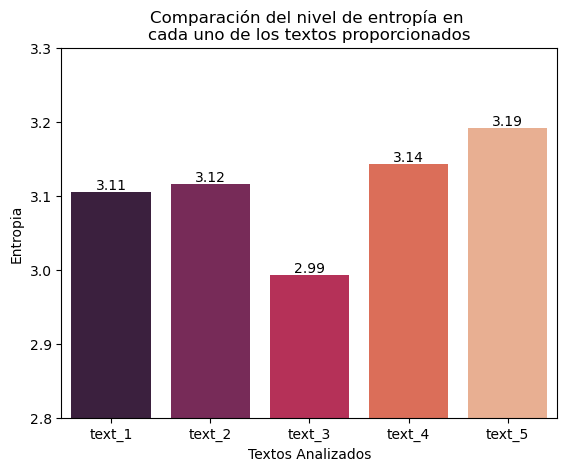

In [24]:
# plt.plot(entropia_df_textos_letras["Textos"], entropia_df_textos_letras["Entropia"])
# plt.title("Entropia en cada uno de los \ntextos analizados a nivel carácter")

ax = sns.barplot(x=entropia_df_textos_letras["Textos"], y=entropia_df_textos_letras["Entropia"], palette="rocket")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            '{:.2f}'.format(p.get_height()), 
            ha='center', va='bottom')

ax.set_ylim(2.8, 3.3)

ax.set_title("Comparación del nivel de entropía en \ncada uno de los textos proporcionados")

ax.set_xlabel("Textos Analizados")
ax.set_ylabel("Entropia")
plt.savefig("comparacion_textos.png")
plt.show()


In [25]:
entropia_libros_df = pd.DataFrame({"Libros":list_of_names, "Entropía_con_Stop_Words":entropia_por_libro1, "Entropía_sin_Stop_Words":entropia_por_libro2})
entropia_libros_df

,Libros,Entropía_con_Stop_Words,Entropía_sin_Stop_Words
0,libro_1,9.164354,11.074319
1,libro_2,9.567097,11.516336


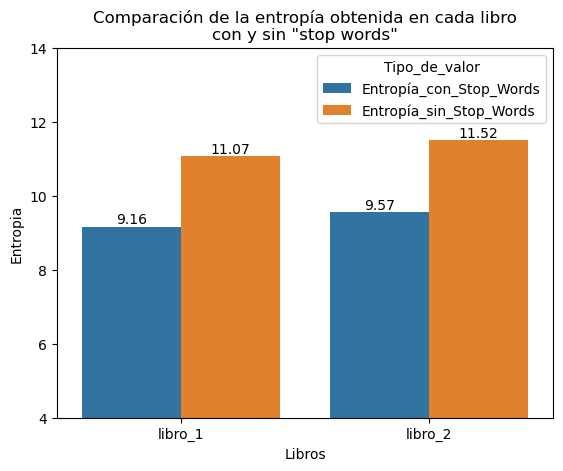

In [26]:
# creando un panel
entropia_libros_df2 = pd.melt(entropia_libros_df, id_vars=['Libros'], var_name='Tipo_de_valor', value_name='Entropia')

# creando la gráfica
ax = sns.barplot(x='Libros', y='Entropia', hue='Tipo_de_valor', data=entropia_libros_df2)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            '{:.2f}'.format(p.get_height()), 
            ha='center', va='bottom')

ax.set_ylim(4, 14)
ax.set_title('Comparación de la entropía obtenida en cada libro\ncon y sin "stop words"')
plt.savefig("Comparacion_libros.png")
plt.show()





<span style="color:DarkGreen; font-size: 30px;">Conclusiones</span>

Como sabemos, la entropía es una medida del monto de información contenido en un texto y sirve para evaluar la complejidad o aleatoridad del lenguaje usado. Por lo que un alto nivel de entropía podría considerarse como un leguaje diverso y menos predecible, mientras que una entropía baja indica que el lenguaje es más repetitivo y predecible.

Tomando en cuenta el comportamiento gráfico de la función para el lanzamiento de una moneda: $p(x)*log_2 p(x)$
![Función](ejemplo.png)

Es de esperarse lo siguiente para cada caso en particular:

### Análisis de textos

Es de esperarse que los textos donde se concentra la probabilidad de ocurrencia en las vocales para cada texto en un rango de 0.36 y 0.44 (Texto_1 la letra "a", Texto_2 la letra "e", Texto_3 la letra "i", Texto_4 la letra "o", Texto_5 la letra "u"). En virtud de lo anterior, los textos del primer ejercicio tienen una entropía relativamente baja, tomando en cuenta que el resto de las letras tienen una probabilidad en un ranto de entre 0.1 y 0.15, tal y como se muestra a continuación:
![probabilidad](probabilidades_textos.png)

Entre los propios textos, también se encuentra que la entropía es relativamente similar, con excepción del texto 3, que podría explicarse por el bajo porcentaje de letras "i" con respecto al resto de las letras en ese texto. En general y como se muestra arriba, un tercio de las letras es la vocal seleccionada en cada texto: 

![entropia_txt](comparacion_textos.png)

### Análisis de libros

En nuestro caso, la entropía en los libros es tres o cuatro veces más que en el caso de los textos (idependientemente de si utilizamos stop words o no). Lo anterior implica que los libros son efectivamente más complejos y menos predecibles que los textos que precisamente se refieren a los poemas malditos (esto es, generan más información), donde los términos utilizados pueden ser relativamente limitados por utilizar en un alto porcentaje una vocal en específico. Eliminamos stop words porque no tienen mucho valor semántico (***no proveen información relevante en el campus***), su eliminación aumentará la probabilidad de que el resto de las palabras sean únicas y, por consiguiente, proveean mucha información, situación que aumentará la entropía, reforzado; además, por el hecho de questos libros son mucho más complejos y difícilmente predecibles. De acuerdo con lo anterior, también se puede ver que el Libro 2 es mucho más complejo y con mayor información que el Libro 1.

![entropia_txt](Comparacion_libros.png)


C:\Users\rodri\AppData\Local\Temp\ipykernel_40888\4195990177.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  probabilidades.plot.bar(ax=ax, subplots=True)


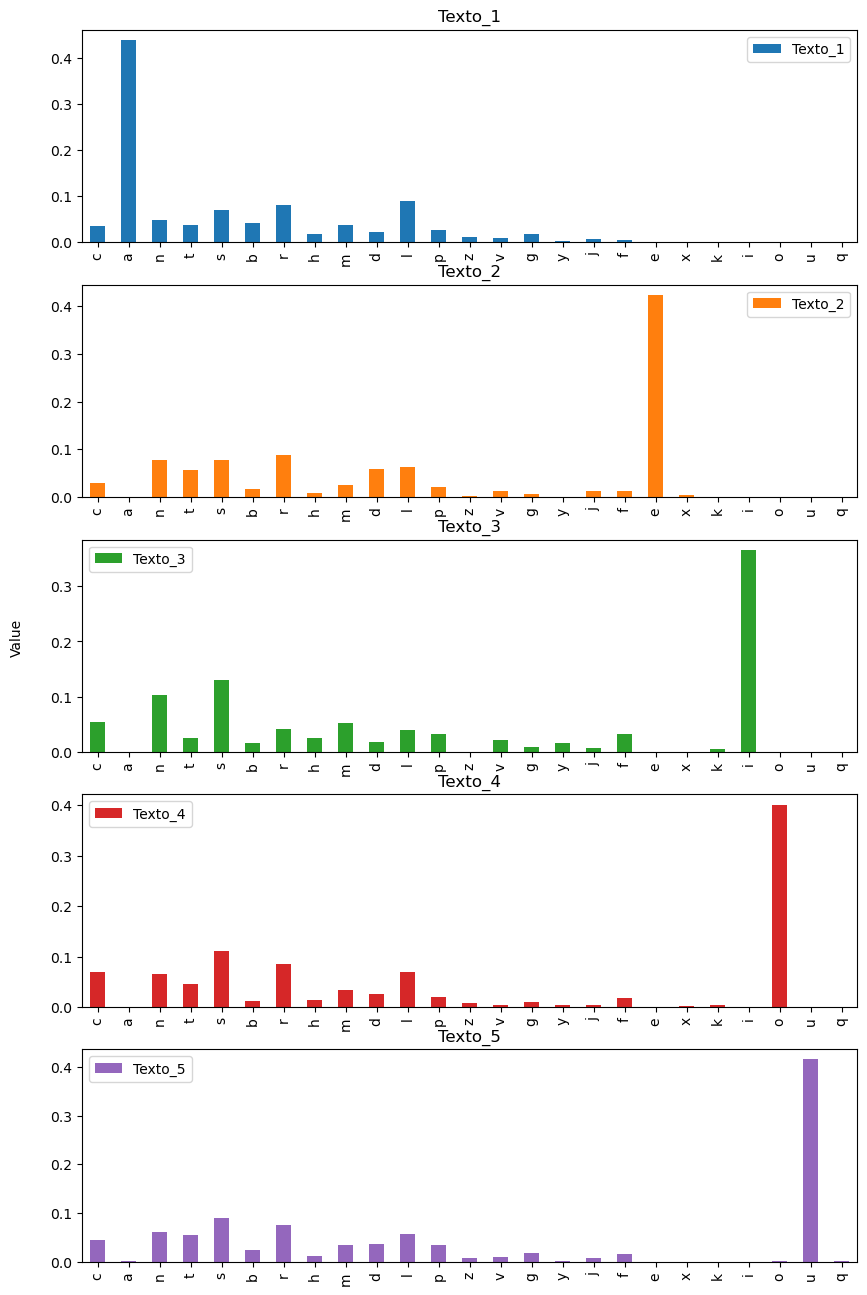

In [27]:
probabilidades = df_numero_caracteres/df_numero_caracteres.sum().values
probabilidades
fig, ax = plt.subplots(figsize=(10,16))
probabilidades.plot.bar(ax=ax, subplots=True)
fig.text(0.06, 0.5, 'Value', ha='center', va='center', rotation='vertical')
plt.savefig("probabilidades_textos.png")
plt.show()
# plt.show()

# # df_numero_caracteres_sim_relat = df_numero_caracteres.style.format('{:,}').background_gradient(cmap ='viridis')\
# #         .set_properties(**{'font-size': '20px'})

# # df_numero_caracteres_sim

In [28]:
probabilidades

,Texto_1,Texto_2,Texto_3,Texto_4,Texto_5
c,0.036162,0.029017,0.054340,0.068460,0.045625
a,0.440321,NaN,NaN,NaN,0.000748
n,0.047743,0.076755,0.103396,0.064714,0.060583
t,0.036634,0.057722,0.025660,0.046322,0.055348
s,0.069960,0.077067,0.129811,0.110354,0.089753
b,0.042543,0.016537,0.015849,0.010899,0.023186
r,0.079887,0.088612,0.042264,0.084128,0.074794
h,0.017490,0.008736,0.025660,0.012943,0.012715
m,0.037343,0.024649,0.052075,0.034060,0.033657
d,0.022926,0.058970,0.017358,0.025886,0.036649


In [29]:
x = np.linspace(.001, 1, num=101, endpoint=True).tolist()

log2_numbers = [i*math.log2(i) for i in x]

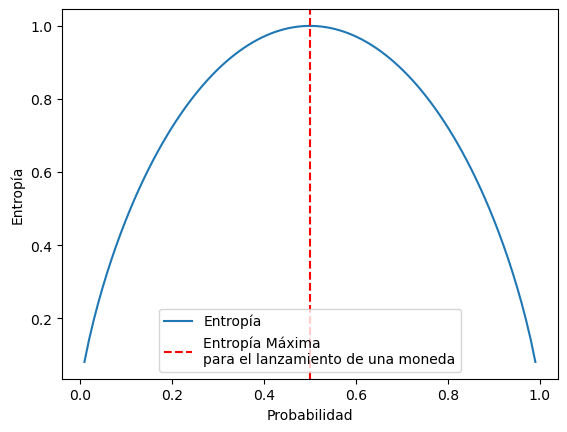

In [30]:

def entropia(p):
    if p == 0 or p == 1:
        return 0
    return -(p * np.log2(p) + (1-p) * np.log2(1-p))

rango_p = np.linspace(0.01, 0.99, 100)

# calculando la entropía para cada valor
valores_entropia = [entropia(p) for p in rango_p]

# graficando
plt.plot(rango_p, valores_entropia, label="Entropía")
plt.axvline(x=0.5, color='r', linestyle='--', label="Entropía Máxima \npara el lanzamiento de una moneda")
plt.xlabel("Probabilidad")
plt.ylabel("Entropía")
plt.legend()
plt.savefig("ejemplo.png")
plt.show()

### Bibliografía y referencias electrónicas

- Information entropy | Journey into information theory | Computer Science | Khan Academy: https://youtu.be/2s3aJfRr9gE
- Jurafsky, D. & Martin, J.H. (2008). Speech and Language Processing. Prentice Hall, Segunda Edición.
- Manning, C. & Schütze, H. (1999). Foundations of Statistical Natural Language Processing, MIT Press. Cambridge, MA. 
- Chen, R.,  Haitao L. & Altmann, G. (2016). Entropy in different text types. Digital Scholarship in the Humanities, vol. 32, Issue 3, pp. 528–542.
- Text Normalization for Natural Language Processing in Python. Disponible en: https://lvngd.com/blog/text-normalization-natural-language-processing-python/
